In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
!git clone https://github.com/yhlee1627/deeplearning.git
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), done.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
Dataset = scaler.fit_transform(dataset)
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

89 23


In [5]:
def create_dataset(dataset, look_back):
    x_data = []
    y_data = []
    for i in range(len(dataset)-look_back-1):
        data = dataset[i:(i+look_back), 0]
        x_data.append(data)
        y_data.append(dataset[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [6]:
look_back = 3
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(85, 3) (85,)
(19, 3) (19,)


In [7]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(85, 1, 3)
(19, 1, 3)


In [8]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(1, look_back)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
85/85 [==============================] - 0s 2ms/step - loss: 4.1243e-05
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 4.5931e-05
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 4.5384e-05
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 5.0070e-05
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 5.5316e-05
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 4.8348e-05
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 4.7185e-05
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 6.8015e-05
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 4.9521e-05
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 5.8973e-05
Epoch 11/100
85/85 [==============================] - 0s 2ms/step - loss: 4.3843e-05
Epoch 12/100
85/85 [==============================] - 0s 2ms/step - loss: 

In [16]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 29ms/step


In [17]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 90.10 RMSE
Test Score: 106.96 RMSE


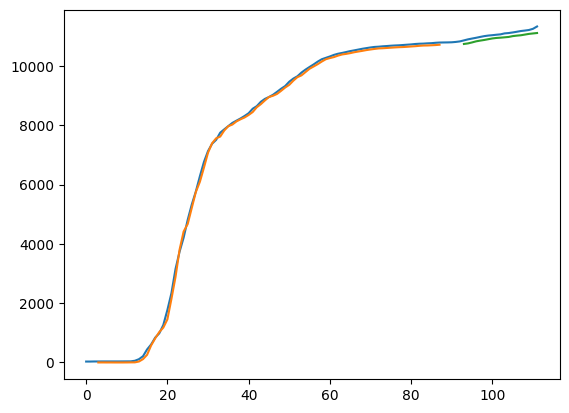

In [19]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back+1)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()